# ARIMA
### p = Order of the AR term 
### d = differencing required to make the time series stationary
### q = Order of the MA term


In [4]:
# In ARIMA the data should be stationary time series

In [67]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib

# Download stock data
data = yf.download('INFY.NS', start='2023-01-01', end='2024-06-07')

# Calculate technical indicators
data['SMA'] = talib.SMA(data['Close'], timeperiod=50)
data['EMA'] = talib.EMA(data['Close'], timeperiod=50)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


[*********************100%***********************]  1 of 1 completed


In [68]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,
2023-01-02,1514.000000,1526.500000,1504.050049,1524.000000,1476.251953,3801140,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,1519.849976,1532.650024,1515.099976,1522.550049,1474.847534,4551130,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,1521.000000,1521.000000,1491.099976,1494.800049,1447.966919,7059590,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,1505.900024,1505.900024,1469.250000,1475.199951,1428.980957,9868404,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06,1470.000000,1475.000000,1446.500000,1448.500000,1403.117432,6443714,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1409.800049,1436.750000,1400.000000,1406.900024,1406.900024,37113815,1464.544995,1473.442588,37.602218,-6.360586,-7.031689,0.671103
2024-06-03,1440.000000,1440.000000,1404.000000,1405.900024,1405.900024,10589244,1459.982996,1470.793860,37.384194,-8.783653,-7.382081,-1.401571
2024-06-04,1409.000000,1415.000000,1358.349976,1393.650024,1393.650024,13736134,1455.802996,1467.768611,34.727819,-11.559176,-8.217500,-3.341676


### ADF test

p-value < 0.05 then we can reject the null hypothesis and infer that the
time series is indeed stationary

if p-value > 0.05 we should find the order of differencing

In [5]:
from statsmodels.tsa.stattools import adfuller 

In [69]:
result = adfuller(data.Close)
print(f"ADF Statistics: {result[0]}" )
print(f"p-value: {result[1]}" )

ADF Statistics: -1.9545303781578904
p-value: 0.3068586603032762


### Autocorellation Function

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
import matplotlib.pyplot as plt

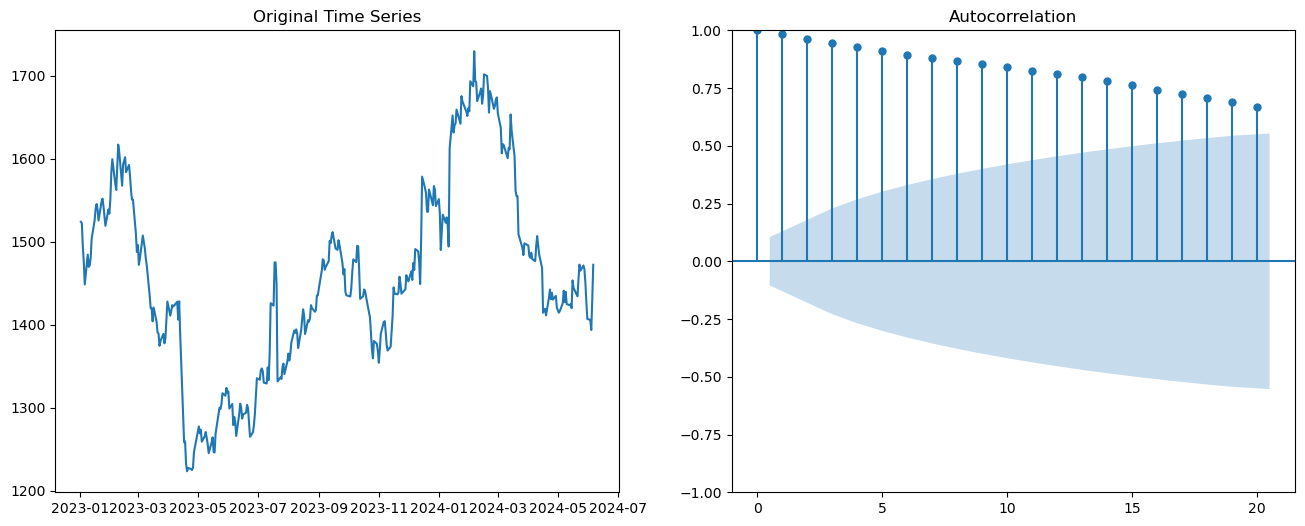

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(data.Close, label='Original Data')
ax1.set_title('Original Time Series')
plot_acf(data.Close, lags=20, ax=ax2)
# plot_pacf(data.Close, lags=20)
plt.show()

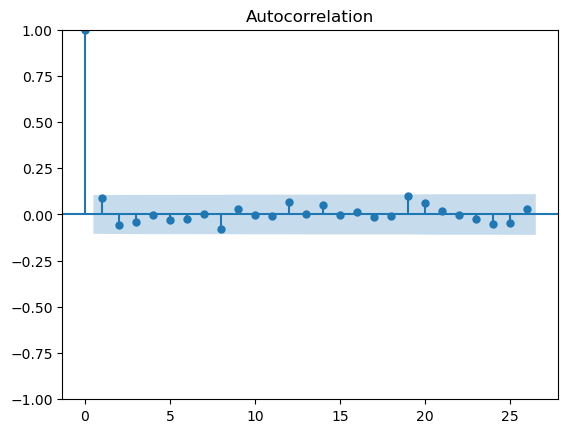

Date
2023-01-03    -1.449951
2023-01-04   -27.750000
2023-01-05   -19.600098
2023-01-06   -26.699951
2023-01-09    35.949951
                ...    
2024-05-31   -20.549927
2024-06-03    -1.000000
2024-06-04   -12.250000
2024-06-05    36.449951
2024-06-06    42.150024
Name: Close, Length: 349, dtype: float64

In [77]:
plot_acf(diff)
plt.show()
diff

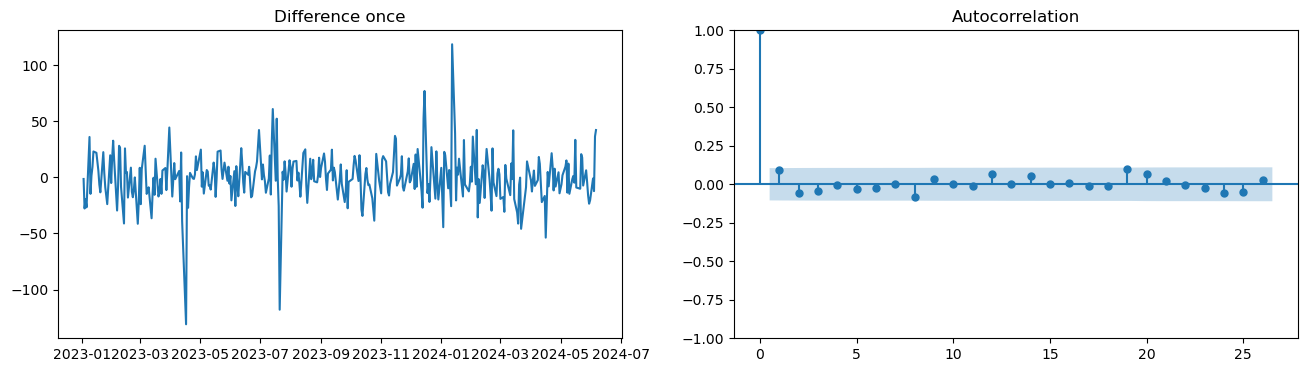

Date
2023-01-03    -1.449951
2023-01-04   -27.750000
2023-01-05   -19.600098
2023-01-06   -26.699951
2023-01-09    35.949951
                ...    
2024-05-31   -20.549927
2024-06-03    -1.000000
2024-06-04   -12.250000
2024-06-05    36.449951
2024-06-06    42.150024
Name: Close, Length: 349, dtype: float64

In [79]:
diff = data.Close.diff().dropna()

fig, (axl, ax2) = plt.subplots(1, 2, figsize=(16,4))

axl.plot(diff)

axl.set_title("Difference once")

plot_acf(diff,ax=ax2)
plt.show()
diff

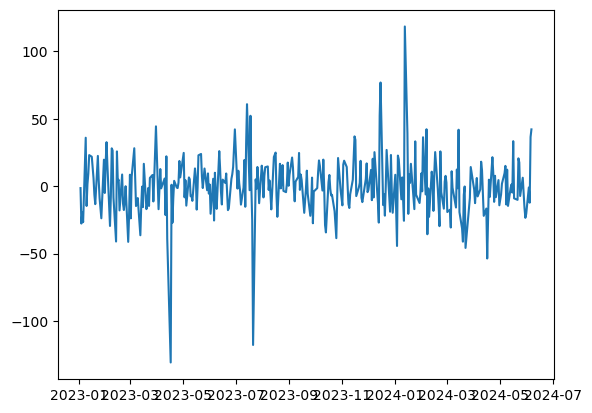

In [82]:
plt.plot(diff)
plt.show()

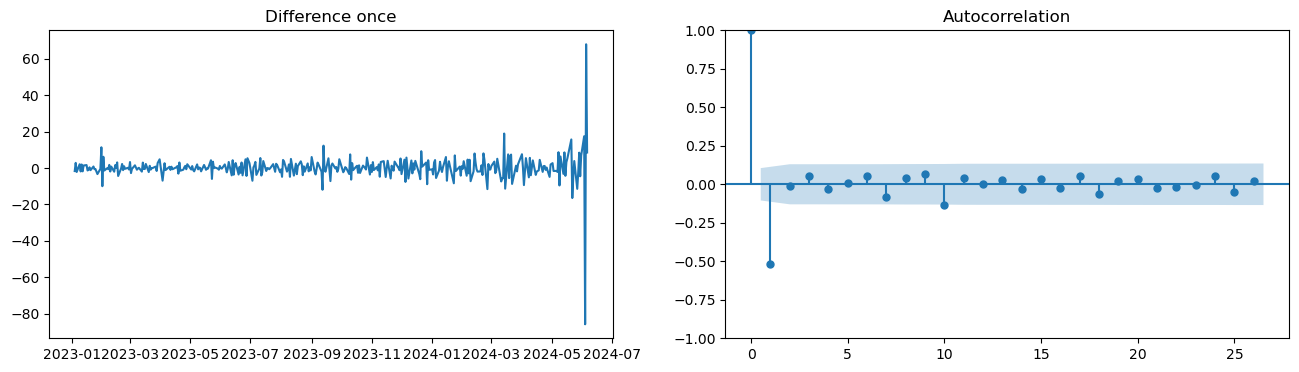

In [37]:
diff2 = data.Close.diff().diff().dropna()

fig, (axl, ax2) = plt.subplots(1, 2, figsize=(16,4))

axl.plot(diff2)

axl.set_title("Difference once")

plot_acf(diff2,ax=ax2)
plt.show()

In [39]:
pip install pmdarima


     -------------------------------------- 615.0/615.0 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Using "pmdarima" we can find the differencing value to make the feature stationary

In [40]:
from pmdarima.arima.utils import ndiffs

In [41]:
ndiffs(data.Close, test="adf")

1

### To find p value we use the Partial Auto Corellation PACF plot

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

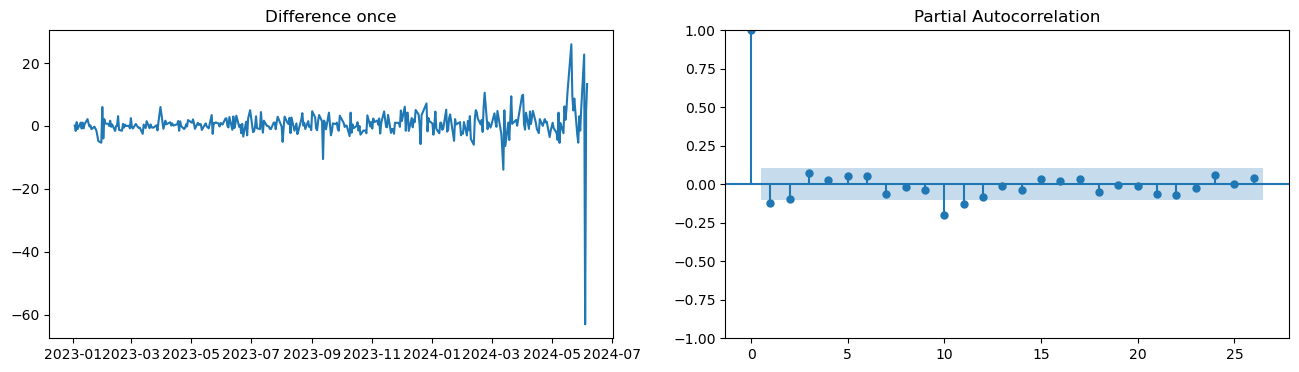

In [51]:
diff = data.Close.diff().dropna()

fig, (axl, ax2) = plt.subplots(1, 2, figsize=(16,4))

axl.plot(diff)
axl.set_title("Difference once")

ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2)
plt.show()

In [58]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data.Close, order=(2,1,1))
result = model.fit()

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [60]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  350
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1042.635
Date:                Fri, 07 Jun 2024   AIC                           2093.270
Time:                        01:52:38   BIC                           2108.690
Sample:                             0   HQIC                          2099.408
                                - 350                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7103      0.359     -1.978      0.048      -1.414      -0.006
ar.L2         -0.1763      0.042     -4.163      0.000      -0.259      -0.093
ma.L1          0.5886      0.360      1.633      0.1

(array([0.00017881, 0.        , 0.00017881, 0.05650492, 0.00518558,
        0.00035763, 0.        , 0.        , 0.        , 0.00017881]),
 array([-59.53382391, -43.55544152, -27.57705913, -11.59867674,
          4.37970565,  20.35808804,  36.33647043,  52.31485283,
         68.29323522,  84.27161761, 100.25      ]),
 <BarContainer object of 10 artists>)

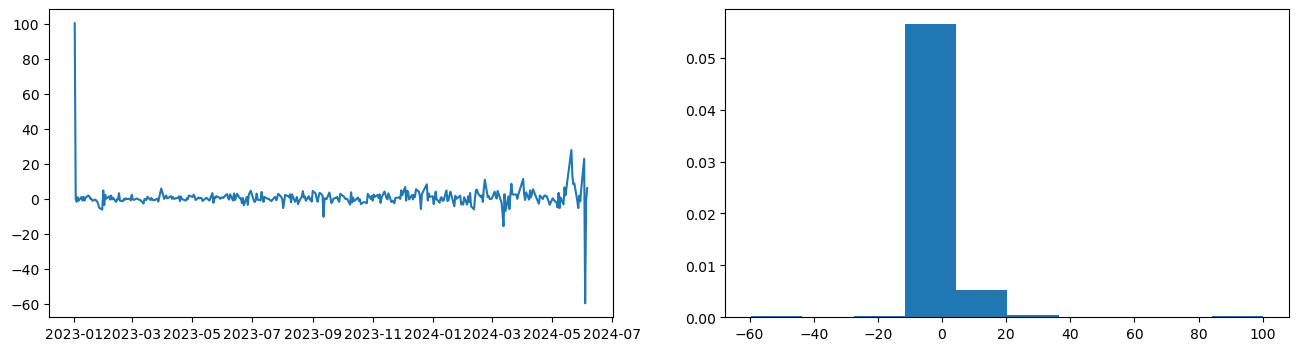

In [63]:
residuals = pd.DataFrame(result.resid)

fig, (axl, ax2) = plt.subplots(1, 2, figsize=(16,4))

axl.plot(residuals) 
ax2.hist(residuals,density=True)

In [66]:
result.plot_predict(
    start=1,
    end=60,
    dynamic=False,
)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'